In [97]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder

In [98]:
data_test_target = pd.read_csv('gender_submission.csv')
data_train = pd.read_csv('train.csv')
data_train = data_train.replace(["female","male"],[0,1])
data_train = data_train.replace(["S","C","Q"],[0,1,2])
data_train = data_train.fillna(10)

data_test = pd.read_csv('test.csv')
data_test = data_test.replace(["female", "male"], [0, 1])
data_test = data_test.replace(["S", "C", "Q"], [0, 1, 2])
Y_test = data_test_target[['Survived']]
X_test = data_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_test = np.nan_to_num(X_test)
Y_test = np.nan_to_num(Y_test)

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,10,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,10,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,10,0.0


In [99]:
Y_train = np.array(Y_train)
X_train = np.array(X_train)

Y_test = np.array(Y_test)
X_test = np.array(X_test)

In [100]:
#model
model = tf.keras.models.Sequential([
     tf.keras.layers.Dense(7,activation="relu"),
     tf.keras.layers.Dense(10,activation="relu"),
     tf.keras.layers.Dense(30,activation="relu"),
     tf.keras.layers.Dense(130,activation="relu"),
     tf.keras.layers.Dense(2,activation="softmax"),
])

In [101]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

In [102]:
output = model.fit(X_train,Y_train ,epochs=500)
model.save('titanic.h5')

Epoch 1/500
28/28 [==============================] - 1s 2ms/step - loss: 0.6587 - accuracy: 0.6397
Epoch 2/500
28/28 [==============================] - 0s 1ms/step - loss: 0.6226 - accuracy: 0.6813
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.6846
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6599
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.6835
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.6835
Epoch 7/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.6835
Epoch 8/500
28/28 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.6813
Epoch 9/500
28/28 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.6970
Epoch 10/500
28/28 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.6914
Epoch 11/

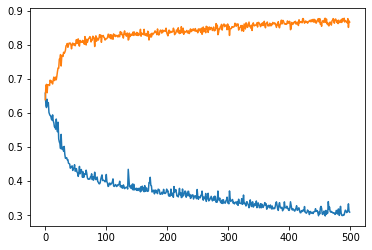

In [103]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])

In [104]:
model=tf.keras.models.load_model('titanic.h5')

# KNN

In [105]:
my_knn = KNeighborsClassifier(n_neighbors=3)
Y_train_flatten = Y_train.flatten()
my_knn.fit(X_train, Y_train_flatten)
Y_pred = my_knn.predict(X_test)
Y_test_flatten = Y_test.flatten()
accuracy = accuracy_score(Y_test_flatten, Y_pred)
accuracy

0.5287081339712919

# MLP

In [106]:
mlp = MLPClassifier(random_state=5, max_iter=300).fit(X_train, Y_train)
mlp.predict_proba(X_test)
mlp.predict(X_test)
accuracy = clf.score(X_test, Y_test)
accuracy

c:\users\sisto.desktop-75v44of\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7703349282296651

# Perceptron

In [107]:
p = Perceptron(random_state=95)
p.fit(X_train, Y_train)

Y_pred = p.predict(X_test)
score = accuracy_score(Y_test, Y_pred)
score

c:\users\sisto.desktop-75v44of\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8133971291866029